## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Reading Data

In [2]:
df = pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


## Exploratory Data Analysis(EDA)

In [3]:
df.shape

(10000, 15)

In [4]:
columns = df.columns.to_list()
columns

['Name',
 'Age',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Date of Admission',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Billing Amount',
 'Room Number',
 'Admission Type',
 'Discharge Date',
 'Medication',
 'Test Results']

In [5]:
df.columns=df.columns.str.replace(' ','_')
df.columns=df.columns.str.lower()
df.head() 

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


## Feature Engineering

**I wil get how many days the patient has been in the hospital from the columns ('date_of_admission','date_of_discharge') and create a new column called 'days_in_hospital' and drop the 'date_of_admission' and 'date_of_discharge' columns.**

In [6]:
df['discharge_date'] =pd.to_datetime(df['discharge_date'])

In [7]:
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'])

In [8]:
df['days_in_hospital'] = (df['discharge_date'] - df['date_of_admission']).dt.days
df['days_in_hospital'].head()

0    14
1    14
2    30
3     1
4    24
Name: days_in_hospital, dtype: int64

In [9]:
new_df = df.drop(columns=['date_of_admission','discharge_date','name','doctor','hospital','room_number'],axis=1)
new_df.head()

,age,gender,blood_type,medical_condition,insurance_provider,billing_amount,admission_type,medication,test_results,days_in_hospital
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 10000 non-null  int64  
 1   gender              10000 non-null  object 
 2   blood_type          10000 non-null  object 
 3   medical_condition   10000 non-null  object 
 4   insurance_provider  10000 non-null  object 
 5   billing_amount      10000 non-null  float64
 6   admission_type      10000 non-null  object 
 7   medication          10000 non-null  object 
 8   test_results        10000 non-null  object 
 9   days_in_hospital    10000 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 781.4+ KB


In [11]:
new_df.describe()

,age,billing_amount,days_in_hospital
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,15.561800
std,19.588974,14067.292709,8.612038
min,18.000000,1000.180837,1.000000
25%,35.000000,13506.523967,8.000000
50%,52.000000,25258.112566,16.000000
75%,68.000000,37733.913727,23.000000
max,85.000000,49995.902283,30.000000


In [12]:
new_df.describe(include='object')

,gender,blood_type,medical_condition,insurance_provider,admission_type,medication,test_results
count,10000,10000,10000,10000,10000,10000,10000
unique,2,8,6,5,3,5,3
top,Female,AB-,Asthma,Cigna,Urgent,Penicillin,Abnormal
freq,5075,1275,1708,2040,3391,2079,3456


In [13]:
new_df.duplicated().sum() # No duplicates

0

In [14]:
new_df.isnull().sum() # No missing values

age                   0
gender                0
blood_type            0
medical_condition     0
insurance_provider    0
billing_amount        0
admission_type        0
medication            0
test_results          0
days_in_hospital      0
dtype: int64

## Analysis of Numerical Variables

In [15]:
numerical = new_df.select_dtypes(include=['int64','float64'])
numerical.head()

,age,billing_amount,days_in_hospital
0,81,37490.983364,14
1,35,47304.064845,14
2,61,36874.896997,30
3,49,23303.322092,1
4,51,18086.344184,24


In [16]:
numerical.describe()

,age,billing_amount,days_in_hospital
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,15.561800
std,19.588974,14067.292709,8.612038
min,18.000000,1000.180837,1.000000
25%,35.000000,13506.523967,8.000000
50%,52.000000,25258.112566,16.000000
75%,68.000000,37733.913727,23.000000
max,85.000000,49995.902283,30.000000


## Detecting Outliers

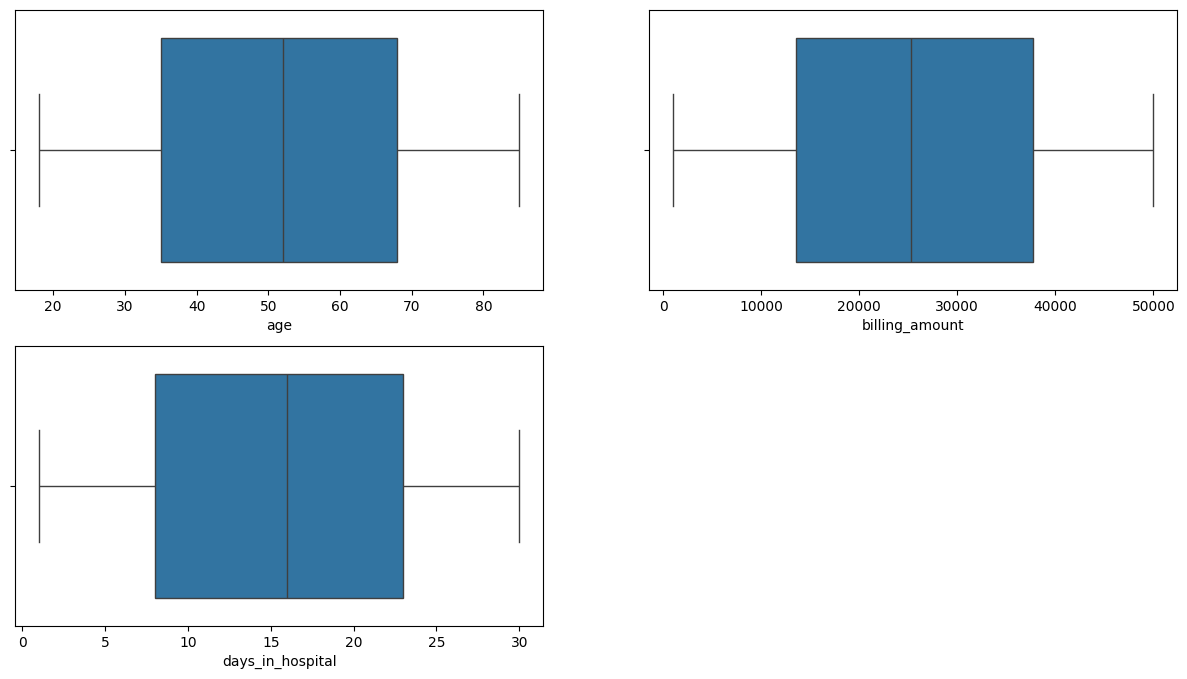

In [17]:
plt.figure(figsize=(15,8))
n=0
for col in numerical.columns:
    plt.subplot(2,2,n+1)
    sns.boxplot(x=df[col])
    n+=1  

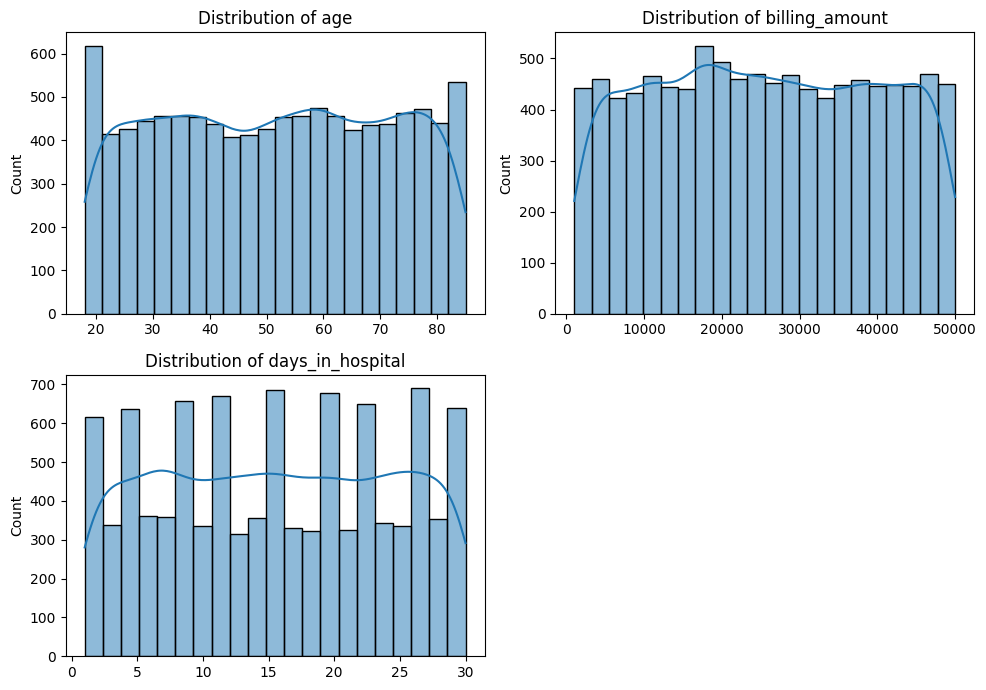

In [18]:
plt.figure(figsize=(10, 7)) 

n = 1

for col in numerical.columns:
    plt.subplot(2, 2, n)
    sns.histplot(df[col], kde=True) # ضفت لك kde=True عشان تشوف شكل التوزيع (المنحنى)
    plt.title(f'Distribution of {col}')
    plt.xlabel("")

    n += 1

plt.tight_layout()
plt.show()

## Insights
- **No Outliers** In The Data
- **No Skewed** variable.
- **No Missing Values**
- **No Duplicate Values**


## Analysis of Categorical Variables

In [19]:
categorical = new_df.select_dtypes(include=['object'])
categorical.head()

,gender,blood_type,medical_condition,insurance_provider,admission_type,medication,test_results
0,Female,O-,Diabetes,Medicare,Elective,Aspirin,Inconclusive
1,Male,O+,Asthma,UnitedHealthcare,Emergency,Lipitor,Normal
2,Male,B-,Obesity,Medicare,Emergency,Lipitor,Normal
3,Male,B-,Asthma,Medicare,Urgent,Penicillin,Abnormal
4,Male,O-,Arthritis,UnitedHealthcare,Urgent,Paracetamol,Normal


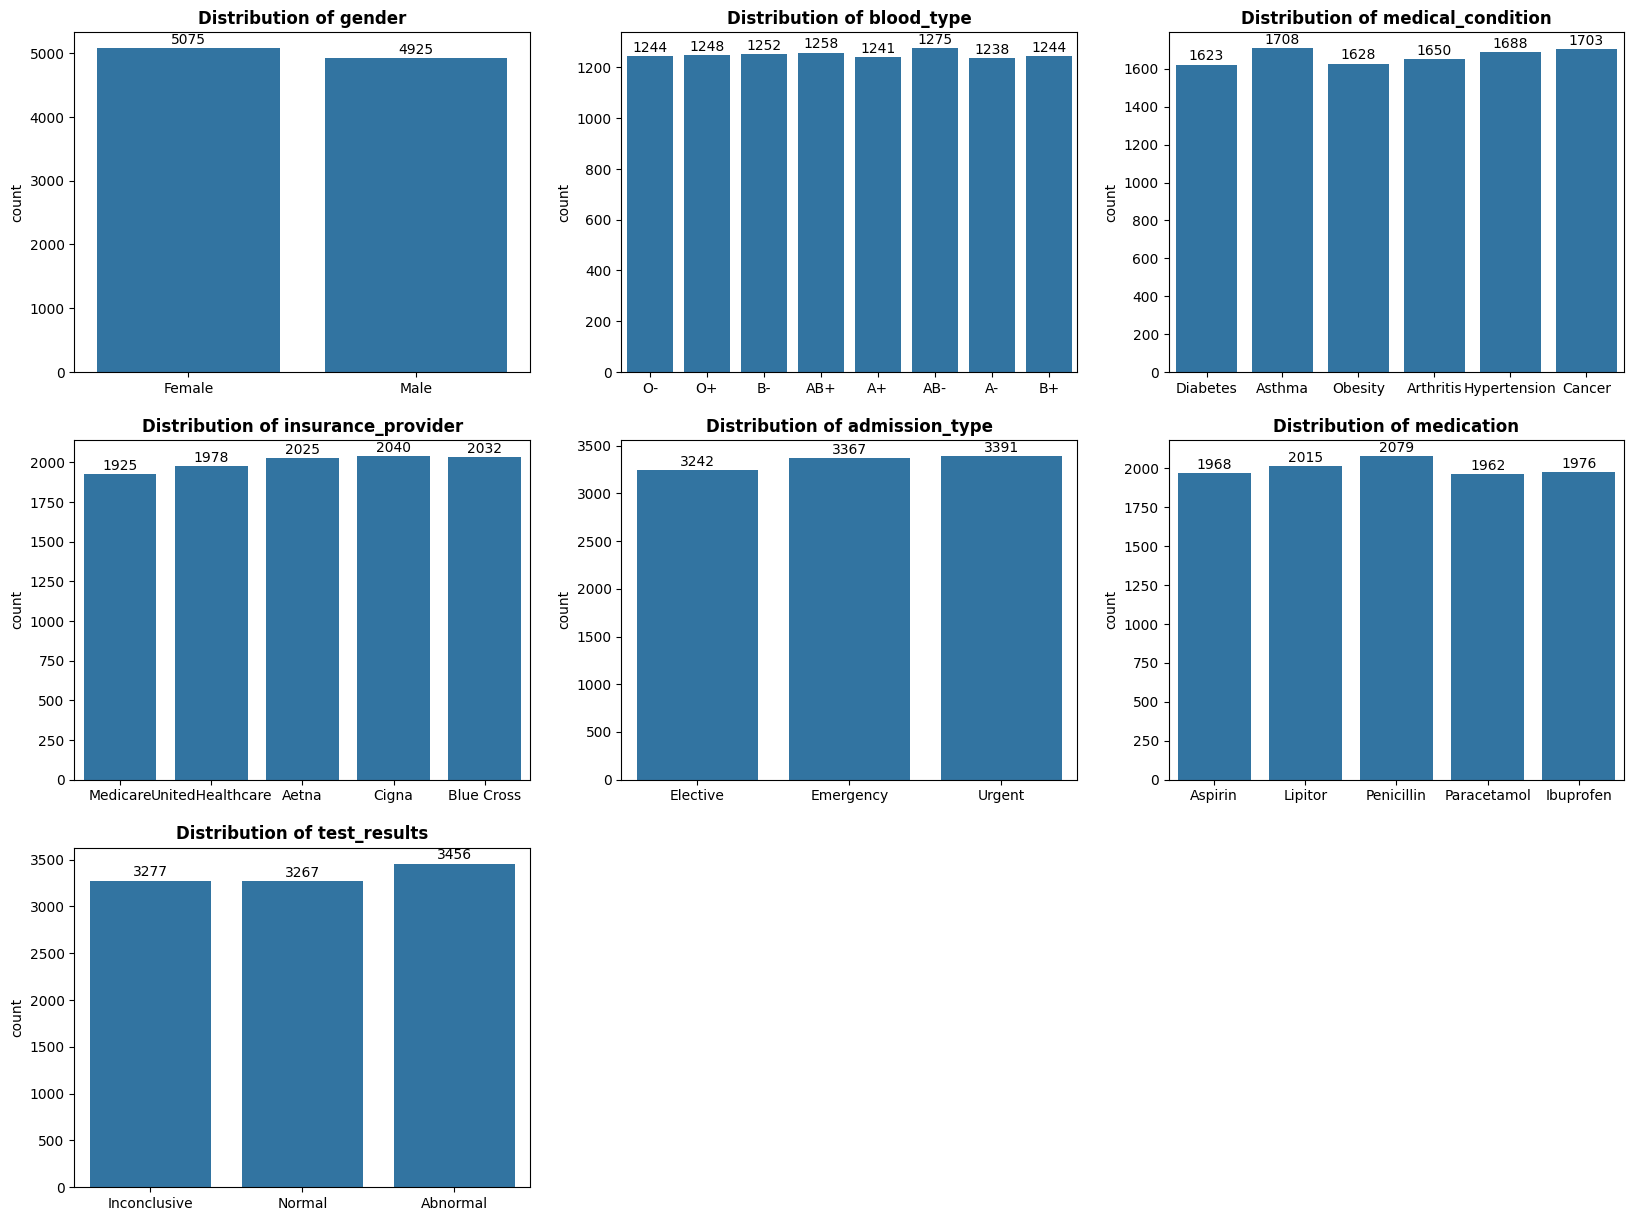

In [20]:
plt.figure(figsize=(20, 15))
n = 1

for col in categorical.columns:
    ax = plt.subplot(3, 3, n)
    
    sns.countplot(x=df[col] ) 

    ax.bar_label(ax.containers[0], padding=1) # put the values on the bars
    
    plt.title(f"Distribution of {col}", fontsize=12, fontweight='bold')
    plt.xlabel("")
    n += 1
plt.show()

## 📊 **Key Insights from Categorical Data**
* **Females** account for the highest number of patients in the dataset. 🚺
* The **AB-** blood group is the most prevalent, followed closely by **O+**. 🩸
* **O-** and **B+** blood groups show an **equal distribution** among patients. ⚖️
* **Asthma** stands out as the **most common** medical condition, with **Cancer** being the second most frequent. 🏥
* **Cigna** is the leading insurance provider, followed by **Aetna**. 🛡️
* **Urgent** admissions are the most frequent, followed by **Emergency** cases. 🚨
* **Penicillin** is the most prescribed medication, followed by **Ibuprofen**. 💊
* The most frequent test result recorded is **Abnormal**, followed by **Normal**. 🧪

## **Data Preprocessing and Model Development**

In [21]:
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
X = new_df.drop(columns=['test_results'],axis=1)
y = new_df['test_results']

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_cols = numerical.columns
cat_cols = categorical.columns.drop('test_results')
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]
)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'billing_amount', 'days_in_hospital'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['gender', 'blood_type', 'medical_condition', 'insurance_provider',
       'admission_type', 'medication'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.36      0.50      0.42       691
           1       0.29      0.24      0.26       656
           2       0.33      0.25      0.28       653

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.32      2000
weighted avg       0.33      0.33      0.32      2000

[[343 194 154]
 [314 158 184]
 [302 187 164]]


In [28]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.34      0.40      0.37       691
           1       0.31      0.29      0.30       656
           2       0.34      0.30      0.32       653

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.33      0.33      0.33      2000



In [29]:
# Mutual Information
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, new_df.test_results)

df_mi = categorical.apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
display(df_mi.head())
display(df_mi.tail())

,MI
test_results,1.098275
medication,0.000546
blood_type,0.000520
medical_condition,0.000386
insurance_provider,0.000257


,MI
blood_type,0.000520
medical_condition,0.000386
insurance_provider,0.000257
gender,0.000151
admission_type,0.000110


**Both Logistic Regression and Random Forest achieved performance comparable to random guessing (≈33%), indicating weak separability between features and target.**

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.3261


## 🔬 Key Findings & Model Insights

####  Data Analysis & Distribution
* **Balanced Classes:** The dataset exhibits a **balanced class distribution**, ensuring that the models were not biased toward a specific category.
* **Statistical Significance:** Initial statistical tests suggest a **weak association** between the selected features and the target variable, indicating a lack of strong predictive signals.

---

####  Model Performance Summary
Despite experimenting with different algorithms, the predictive power remained limited:

| Model | Performance (Accuracy) | Status |
| :--- | :--- | :--- |
| **Logistic Regression** | ~33% | Random Baseline |
| **Random Forest** | ~33% | Random Baseline |

> **Note:** In a balanced 3-class problem, an accuracy of **~33%** is equivalent to a **random guess**.

---

####  Reliability & Validation
* **Consistent Results:** Automated **Cross-Validation** confirmed that the low performance is stable across different data folds, ruling out issues with specific data splits.
* **Feature Importance:** Analysis revealed **no dominant predictors**; no single feature contributed significantly to the model's ability to distinguish between classes.

---

####  Technical Conclusion
The models are currently unable to capture a meaningful pattern from the provided features. This suggests that the **underlying signal is either missing** from the current dataset or the relationship is too complex for the current feature set to represent.